In [1]:
from proj1_helpers import *
from implementations import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read train_y=LABELS, train_x=FEATURES and train_id=EVENT_IDS from dataset.
subsamp = False
y, x, id_ = load_csv_data('../data/train.csv', sub_sample=subsamp)
y_out_test, x_out_test, id_out_test = load_csv_data('../data/test.csv', sub_sample=subsamp)

In [46]:
clean=True
degree = 2
feature_expansion = True
x_train, y_train, x_test, y_test = split_data(x, y, ratio=0.01, seed = 42)
# Clean data
if clean:
    y_train, x_train = clean_data(y_train, x_train)
    y_test, x_test = clean_data(y_test, x_test)
# Standardize data
x_train_std = standardize_features(x_train)
x_test_std = standardize_features(x_test)
x_train = x_train_std[0]
x_test = x_test_std[0]
# Build data matrix
tx_train = build_poly(x_train, degree)
tx_test = build_poly(x_test, degree)
tx_train.shape, tx_test.shape


((2500, 61), (247500, 61))

# Gradient Descent

In [47]:
w_init = np.array([0] * tx_train.shape[1])
max_iter = 400
gamma = 0.00009
w_gd, loss_gd = least_squares_GD(y_train,
                                 tx_train,
                                 w_init,
                                 max_iter,
                                 gamma,
                                 pr=True,
                                 adapt_gamma=False,
                                 kind='mse',
                                accel=True)
gd_prediction = predict_labels(w_gd, tx_test)
acc_gd = accuracy_ratio(gd_prediction, y_test)
print('Accuracy ratio = %.3f' % acc_gd)
print('Test loss = %.3f' % compute_loss(y_test, tx_test, w_gd))
print('Train loss = %.3f' % loss_gd)

GD (0/399): loss=0.5
GD (100/399): loss=0.36777550540771
GD (200/399): loss=0.32287760654315034
GD (300/399): loss=0.322319467671135
Accuracy ratio = 0.764
Test loss = 0.840
Train loss = 0.323


np.savetxt('../data/w_gd_acc.dat', w_gd)

# Stochastic Gradient Descent

In [48]:
w_init = np.array([0] * tx_train.shape[1])
max_iter = 5000
gamma = 1e-4
batch_size = 1

w_sgd, loss_sgd = least_squares_SGD(y_train,
                                    tx_train,
                                    w_init,
                                    batch_size,
                                    max_iter,
                                    gamma,
                                    pr=True,
                                    adapt_gamma=False,
                                    choose_best=True)
sgd_prediction = predict_labels(w_sgd, tx_test)
acc_sgd = accuracy_ratio(sgd_prediction, y_test)
print('Accuracy ratio = %.2f' % acc_sgd)
print('Test loss = %.2e' % compute_loss(y_test, tx_test, w_sgd))
print('Train loss = %.2e' % loss_sgd)

SGD (0/4999): loss=0.5
SGD (100/4999): loss=0.49394611737348787
SGD (200/4999): loss=0.40952251926339756
SGD (300/4999): loss=0.41259167153994447
SGD (400/4999): loss=0.3195043897270198
SGD (500/4999): loss=0.19865021603627425
SGD (600/4999): loss=0.8754062403009691
SGD (700/4999): loss=0.1844956456280497
SGD (800/4999): loss=0.3256630461915902
SGD (900/4999): loss=0.3345381579968245
SGD (1000/4999): loss=0.5111934578684718
SGD (1100/4999): loss=0.7004690571549949
SGD (1200/4999): loss=0.20454478114943153
SGD (1300/4999): loss=0.7275440943988668
SGD (1400/4999): loss=0.10573665773965023
SGD (1500/4999): loss=0.25078284063311
SGD (1600/4999): loss=0.6351898720663629
SGD (1700/4999): loss=0.101596783765602
SGD (1800/4999): loss=0.717059610843827
SGD (1900/4999): loss=0.9274335384058243
SGD (2000/4999): loss=0.19936774214061875
SGD (2100/4999): loss=0.1465252896774112
SGD (2200/4999): loss=0.23213667432776555
SGD (2300/4999): loss=0.4621281193572036
SGD (2400/4999): loss=0.829203525715561

# Least Squares

In [49]:
w_lsq, loss_lsq = least_squares(y_train, tx_train)
lsq_prediction = predict_labels(w_lsq, tx_test)
acc_lsq = accuracy_ratio(lsq_prediction, y_test)
print('Accuracy ratio = %.2f' % acc_lsq)
print('Train loss = %.2f' % loss_lsq)
print('Test loss = %.2e' % compute_loss(y_test, tx_test, w_lsq))

Accuracy ratio = 0.36
Train loss = 0.31
Test loss = 1.77e+02


np.savetxt('../data/w_lsq.dat', w_lsq)

# Ridge Regression

In [50]:
lambda_ = 3.3e-2
w_rr, loss_rr = ridge_regression(y_train, tx_train, lambda_)
rr_prediction = predict_labels(w_rr, tx_test)
acc_rr = accuracy_ratio(rr_prediction, y_test)
print('Accuracy ratio = %.3f'%acc_rr)
print('Test loss = %.3f'%compute_loss(y_test, tx_test, w_rr))
print('Train loss = %.3f'%loss_rr)

Accuracy ratio = 0.770
Test loss = 0.642
Train loss = 0.309


np.savetxt('../data/w_rr.dat', w_rr)

In [39]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 3, 50)
    # split the data, and return train and test data
    x_train, y_train, x_test, y_test = split_data(x, y, ratio, seed)
    #Clean
    if clean:
        y_train, x_train = clean_data(y_train, x_train)
        y_test, x_test = clean_data(y_test, x_test)
    # form train and test data with offset column
    x_train_std = standardize_features(x_train)[0]
    x_test_std = standardize_features(x_test)[0]
    tx_train=build_poly(x_train_std, degree)
    tx_test=build_poly(x_test_std, degree)
    rmse_tr = []
    rmse_te = []
    accuracies = []
    for ind, lambda_ in enumerate(lambdas):
        # calcualte weight through least square.
        w_train, loss_train = ridge_regression(y_train, tx_train, lambda_)
        rmse_tr.append(np.sqrt(2*loss_train))
        rmse_te.append(np.sqrt(2*compute_loss(y_test, tx_test, w_train, kind = 'mse')))
        accuracies.append(accuracy_ratio(predict_labels(w_train, tx_test), y_test))
        print("proportion={p}, degree={d}, lambda={l:.3e}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}, Accuracy={ac:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind], ac=accuracies[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)
    plt.figure()
    plt.semilogx(lambdas,accuracies, marker='o')
    
def plot_train_test(train_errors, test_errors, lambdas, degree):
    """
    train_errors, test_errors and lambas should be list (of the same size) the respective train error and test error for a given lambda,
    * lambda[0] = 1
    * train_errors[0] = RMSE of a ridge regression on the train set
    * test_errors[0] = RMSE of the parameter found by ridge regression applied on the test set
    
    degree is just used for the title of the plot.
    """
    plt.semilogx(lambdas, train_errors, color='b', marker='*', label="Train error")
    plt.semilogx(lambdas, test_errors, color='r', marker='*', label="Test error")
    plt.xlabel("lambda")
    plt.ylabel("RMSE")
    plt.title("Ridge regression for polynomial degree " + str(degree))
    leg = plt.legend(loc=1, shadow=True)
    leg.draw_frame(False)
    plt.savefig("../results/ridge_regression")

proportion=0.01, degree=3, lambda=1.000e-05, Training RMSE=0.762, Testing RMSE=1.302, Accuracy=0.783
proportion=0.01, degree=3, lambda=1.456e-05, Training RMSE=0.762, Testing RMSE=1.303, Accuracy=0.783
proportion=0.01, degree=3, lambda=2.121e-05, Training RMSE=0.762, Testing RMSE=1.306, Accuracy=0.783
proportion=0.01, degree=3, lambda=3.089e-05, Training RMSE=0.762, Testing RMSE=1.310, Accuracy=0.783
proportion=0.01, degree=3, lambda=4.498e-05, Training RMSE=0.762, Testing RMSE=1.315, Accuracy=0.783
proportion=0.01, degree=3, lambda=6.551e-05, Training RMSE=0.762, Testing RMSE=1.322, Accuracy=0.783
proportion=0.01, degree=3, lambda=9.541e-05, Training RMSE=0.762, Testing RMSE=1.333, Accuracy=0.783
proportion=0.01, degree=3, lambda=1.389e-04, Training RMSE=0.762, Testing RMSE=1.347, Accuracy=0.782
proportion=0.01, degree=3, lambda=2.024e-04, Training RMSE=0.762, Testing RMSE=1.367, Accuracy=0.782
proportion=0.01, degree=3, lambda=2.947e-04, Training RMSE=0.762, Testing RMSE=1.394, Accur

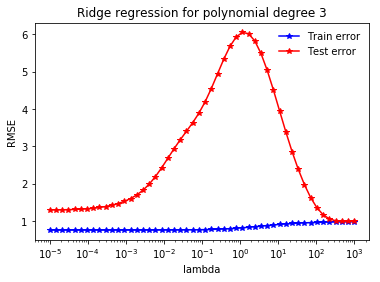

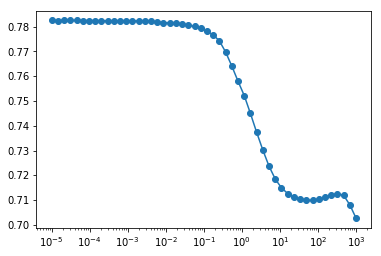

In [41]:
seed = 42
degree = 3
split_ratio = 0.01
ridge_regression_demo(x, y, degree, split_ratio, seed)

Best lambda from accuracy: 1.00e-07
Best lambda from error: 3.29e-02


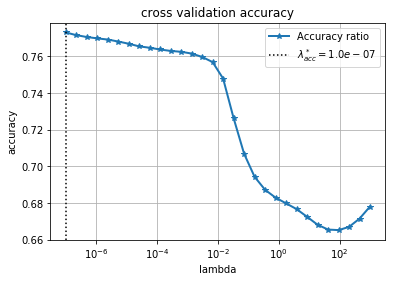

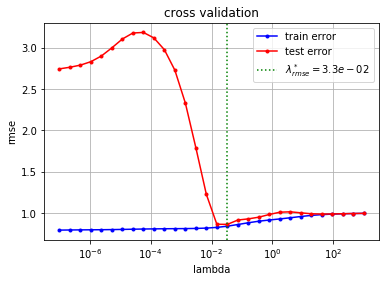

In [42]:
def cross_validation_visualization(lambds, mse_tr, mse_te):
    """Visualization the curves of rmse_tr and rmse_te."""
    best_l_err = lambds[np.argmin(mse_te)]
    print('Best lambda from error: %.2e'%best_l_err)
    plt.semilogx(lambds, mse_tr, marker=".", color='b', label='train error')
    plt.semilogx(lambds, mse_te, marker=".", color='r', label='test error')
    plt.axvline(best_l_err, c = 'g', label = '$\lambda^*_{rmse}=%.1e$'%best_l_err, ls = ':')
    plt.xlabel("lambda")
    plt.ylabel("rmse")
    plt.title("cross validation")
    plt.legend(loc=0)
    plt.grid(True)
    plt.savefig("../results/cross_validation")
def cross_validation_visualization_accuracy(lambdas, accuracies):
    """Visualization the Accuracy curve."""
    plt.semilogx(lambdas, accuracies, lw =2, marker = '*', label = 'Accuracy ratio')
    best_l_acc = lambdas[np.argmax(accuracies)]
    plt.axvline(best_l_acc, c= 'k', label = '$\lambda^*_{acc}=%.1e$'%best_l_acc, ls = ':')
    print('Best lambda from accuracy: %.2e'%best_l_acc)
    plt.xlabel("lambda")
    plt.ylabel("accuracy")
    plt.title("cross validation accuracy")
    plt.legend(loc=0)
    plt.grid(True)
    plt.savefig("../results/cross_validation_accuracies")
def cross_validation_demo():
    seed = 42
    degree = 3
    k_fold = 2
    lambdas = np.logspace(-7, 3, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    std_tr = []
    std_te = []
    accuracies = []
    # cross validation
    for ind, lambda_ in enumerate(lambdas):
        x_validation = np.array([cross_validation(y, x, k_indices, k, lambda_, degree) for k in range(k_fold)])
        rmse_tr.append(np.mean(np.sqrt(2 * x_validation[:, 0])))
        rmse_te.append(np.mean(np.sqrt(2 * x_validation[:, 1])))
        std_tr.append(np.std(np.sqrt(2 * x_validation[:, 0])))
        std_te.append(np.std(np.sqrt(2 * x_validation[:, 1])))
        accuracies.append(np.mean(x_validation[:,2]))
    cross_validation_visualization_accuracy(lambdas, accuracies)
    plt.figure()
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()


# Bias-Variance test

In [31]:
def bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te):
    """visualize the bias variance decomposition."""
    rmse_tr_mean = np.expand_dims(np.mean(rmse_tr, axis=0), axis=0)
    rmse_te_mean = np.expand_dims(np.mean(rmse_te, axis=0), axis=0)
    print(rmse_te_mean, rmse_tr_mean)
    plt.plot(degrees,
             rmse_tr.T,
             'b',
             linestyle="-",
             color=([0.7, 0.7, 1]),
             label='train',
             linewidth=0.3)
    plt.plot(degrees,
             rmse_te.T,
             'r',
             linestyle="-",
             color=[1, 0.7, 0.7],
             label='test',
             linewidth=0.3)
    plt.plot(degrees,
             rmse_tr_mean.T,
             'b',
             linestyle="-",
             label='train',
             linewidth=3)
    plt.plot(degrees,
             rmse_te_mean.T,
             'r',
             linestyle="-",
             label='test',
             linewidth=3)
    plt.ylim(0.7, 1)
    plt.xlabel("degree")
    plt.ylabel("error")
    plt.title("Bias-Variance Decomposition")
    plt.savefig("bias_variance")


def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    ratio_train = 0.5
    degrees = range(1, 8)
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        # split data with a specific seed
        x_train, y_train, x_test, y_test = split_data(x, y, ratio_train, seed)
        x_train_std = standardize(x_train)[0]
        x_test_std = standardize(x_test)[0]
        for index_degrees, degree in enumerate(degrees):
            tx_train = build_poly(x_train_std, degree)
            tx_test = build_poly(x_test_std, degree)
            weight, loss_tr = ridge_regression(y_train, tx_train, 1.89e-05 )
            loss_te = compute_loss(y_test, tx_test, weight, kind='mse')
            rmse_tr[index_seed, index_degrees] = np.sqrt(2 * loss_tr)
            rmse_te[index_seed, index_degrees] = np.sqrt(2 * loss_te)
    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)


bias_variance_demo()

KeyboardInterrupt: 

In [34]:
print(id_out_test.shape)
x_out_test_std = standardize_features(x_out_test)
x_out = x_out_test_std[0]
tx_out = build_poly(x_out, 2)

create_csv_submission(id_out_test, predict_labels(w_rr, tx_out) , '../results/rr_pred.csv')
create_csv_submission(id_out_test, predict_labels(w_gd, tx_out) , '../results/gd_pred_accel.csv')
create_csv_submission(id_out_test, predict_labels(w_lsq, tx_out) , '../results/lsq_pred.csv')
#create_csv_submission(id_out_test, predict_labels(w_sgd, tx_out) , '../results/sgd_pred_noadapt.csv')

(568238,)


# Logistic Regression

In [51]:
def predict_labels_log(weights, data):
    """Generates class predictions given weights, and a test data matrix.
    Quantizes according to the logistic regression cutoff at 0.5."""
    y_pred = np.dot(data, weights)
    y_pred[np.where(y_pred <= 0.5)] = -1
    y_pred[np.where(y_pred > 0.5)] = 1
    return y_pred

In [69]:
def compute_loss_logistic(y, tx, w):
    '''Compute the loss for logistic regression.'''
    loss = (sum(np.log(1 + np.exp(tx.dot(w)))) - y.T.dot(tx.dot(w)))/len(y)
    return loss
def sigmoid(t):
    """apply sigmoid function on t."""
    return np.exp(t)/(1 + np.exp(t))
def compute_gradient_logistic(y, tx, w):
    """Compute the gradient for logistic regression loss."""
    return (tx.T.dot(sigmoid(tx.dot(w))) - tx.T.dot(y))/len(y)

In [70]:
y_train_log = np.copy(y_train)
y_train_log[y_train == -1] = 0

y_test_log = np.copy(y_test)
y_test_log[y_test == -1] = 0

w_init = np.array([0] * tx_train.shape[1])
max_iter = 10000
gamma = 1e-4
w_lrgd, loss_lrgd = logistic_regression(y_train_log,
                                        tx_train,
                                        w_init,
                                        max_iter,
                                        gamma,
                                        pr=True,
                                        adapt_gamma=False,
                                       accel=False)

lrgd_prediction = predict_labels_log(w_lrgd, tx_test)
print(sigmoid(tx_test.dot(w_lrgd)))
acc_lrgd = accuracy_ratio(lrgd_prediction, y_test)

print('Accuracy ratio = %.3f' % acc_lrgd)
print('Test loss = %.3f' % compute_loss_logistic(y_test_log, tx_test, w_lrgd))
print('Train loss = %.3f' % loss_lrgd)

Logistic Regression GD (0/9999): loss=1732.8679513997677
Logistic Regression GD (100/9999): loss=1068.1643585222646
Logistic Regression GD (200/9999): loss=1047.8725563047246
Logistic Regression GD (300/9999): loss=1039.5055466203478
Logistic Regression GD (400/9999): loss=1034.8440676439238
Logistic Regression GD (500/9999): loss=1031.9080057045617
Logistic Regression GD (600/9999): loss=1029.9106803711798
Logistic Regression GD (700/9999): loss=1028.471521068044
Logistic Regression GD (800/9999): loss=1027.3865893021266
Logistic Regression GD (900/9999): loss=1026.5389546939352
Logistic Regression GD (1000/9999): loss=1025.857935109504
Logistic Regression GD (1100/9999): loss=1025.298796679546
Logistic Regression GD (1200/9999): loss=1024.8320107032644
Logistic Regression GD (1300/9999): loss=1024.4373049989526
Logistic Regression GD (1400/9999): loss=1024.1002460368798
Logistic Regression GD (1500/9999): loss=1023.8102105505466
Logistic Regression GD (1600/9999): loss=1023.559145205

/home/daniel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


In [68]:
lambda_ = 10
gamma = 2e-4
w_rlrgd, loss_rlrgd = reg_logistic_regression(y_train_log,
                                              tx_train,
                                              lambda_,
                                              w_init,
                                              max_iter,
                                              gamma,
                                              pr=True,
                                              adapt_gamma=False, 
                                              accel=False)
rlrgd_prediction = predict_labels_log(w_rlrgd, tx_test)
acc_rlrgd = accuracy_ratio(rlrgd_prediction, y_test)
print('Accuracy ratio = %.3f' % acc_rlrgd)
print('Test loss = %.3f' % compute_loss_logistic(y_test_log, tx_test, w_rlrgd))
print('Train loss = %.3f' % loss_rlrgd)

 Regularized Logistic Regression GD (0/9999): loss=1732.8679513997677
 Regularized Logistic Regression GD (100/9999): loss=1402.3746742088995
 Regularized Logistic Regression GD (200/9999): loss=1379.8775773453915
 Regularized Logistic Regression GD (300/9999): loss=1374.032961904269
 Regularized Logistic Regression GD (400/9999): loss=1371.5542185765335
 Regularized Logistic Regression GD (500/9999): loss=1370.266798281296
 Regularized Logistic Regression GD (600/9999): loss=1369.5301863757925
 Regularized Logistic Regression GD (700/9999): loss=1369.081721080187
 Regularized Logistic Regression GD (800/9999): loss=1368.7948058850075
 Regularized Logistic Regression GD (900/9999): loss=1368.6033700138241
 Regularized Logistic Regression GD (1000/9999): loss=1368.4711103259704
 Regularized Logistic Regression GD (1100/9999): loss=1368.3771630255662
 Regularized Logistic Regression GD (1200/9999): loss=1368.3089930511803
 Regularized Logistic Regression GD (1300/9999): loss=1368.2587331